In [1]:
import csv
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import descartes
from shapely.geometry import Point, Polygon
import adjustText as aT

#Load in the CSV Bike Station Location Data
df = pd.read_csv('HRSQ12020.csv')

#combine the latitude and longitude to make coordinates
df['coordinates'] = df[['Longitude', 'Latitude']].values.tolist()

# Change the coordinates to a geoPoint
df['coordinates'] = df['coordinates'].apply(Point)

#fixing wrong negative value for Latitude
df.loc[df["Latitude"] == df["Latitude"].min()]
df.at[80, 'Latitude'] = 40.467715

In [2]:
#get the pittsburgh neighborhoods map
pittMap = gpd.read_file('Neighborhoods/ecc95d19-e9fb-46a3-be05-e7e103f362a52020328-1-565pof.jnegf.shp')

#find the centroids of each neighborhood for labeling
pittMap["center"] = pittMap["geometry"].centroid
map_points = pittMap.copy()
map_points.set_geometry("center", inplace = True)
map_points.head()

<ipython-input-2-beb72d1470d4>:5: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  pittMap["center"] = pittMap["geometry"].centroid


,objectid,fid_blockg,statefp10,countyfp10,tractce10,blkgrpce10,geoid10,namelsad10,mtfcc10,funcstat10,...,page_numbe,plannerass,created_us,created_da,last_edite,last_edi_1,Shape__Are,Shape__Len,geometry,center
0,1,0.0,42,003,040500,1,420030405001,Block Group 1,G5030,S,...,15,Derek Dauphin,pgh.admin,1571840236403,pgh.admin,1571840236403,7.842997e+06,11525.904546,"POLYGON ((-79.95304 40.44203, -79.95302 40.442...",POINT (-79.95465 40.43862)
1,2,1.0,42,003,040400,1,420030404001,Block Group 1,G5030,S,...,15,Derek Dauphin,pgh.admin,1571840236403,pgh.admin,1571840236403,1.390469e+07,20945.562570,"POLYGON ((-79.95455 40.45882, -79.95427 40.458...",POINT (-79.95356 40.44828)
2,3,2.0,42,003,040200,2,420030402002,Block Group 2,G5030,S,...,15,Derek Dauphin,pgh.admin,1571840236403,pgh.admin,1571840236403,5.998649e+06,18280.484515,"POLYGON ((-79.96230 40.44294, -79.96220 40.442...",POINT (-79.96608 40.44023)
3,4,3.0,42,003,030500,2,420030305002,Block Group 2,G5030,S,...,15,Derek Dauphin,pgh.admin,1571840236403,pgh.admin,1571840236403,7.203337e+06,15697.914337,"POLYGON ((-79.98275 40.44641, -79.98273 40.446...",POINT (-79.98379 40.44274)
4,5,5.0,42,003,020300,1,420030203001,Block Group 1,G5030,S,...,15,Andrea Lavin Kossis,pgh.admin,1571840236403,pgh.admin,1571840236403,1.694875e+07,24019.532672,"POLYGON ((-79.97494 40.45629, -79.97484 40.456...",POINT (-79.98100 40.45383)


In [3]:
#find the centroids of each neighborhood for labeling
pittMap["center"] = pittMap["geometry"].centroid
map_points = pittMap.copy()
map_points.set_geometry("center", inplace = True)
map_points.head()

<ipython-input-3-ef5c5bff357c>:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  pittMap["center"] = pittMap["geometry"].centroid


,objectid,fid_blockg,statefp10,countyfp10,tractce10,blkgrpce10,geoid10,namelsad10,mtfcc10,funcstat10,...,page_numbe,plannerass,created_us,created_da,last_edite,last_edi_1,Shape__Are,Shape__Len,geometry,center
0,1,0.0,42,003,040500,1,420030405001,Block Group 1,G5030,S,...,15,Derek Dauphin,pgh.admin,1571840236403,pgh.admin,1571840236403,7.842997e+06,11525.904546,"POLYGON ((-79.95304 40.44203, -79.95302 40.442...",POINT (-79.95465 40.43862)
1,2,1.0,42,003,040400,1,420030404001,Block Group 1,G5030,S,...,15,Derek Dauphin,pgh.admin,1571840236403,pgh.admin,1571840236403,1.390469e+07,20945.562570,"POLYGON ((-79.95455 40.45882, -79.95427 40.458...",POINT (-79.95356 40.44828)
2,3,2.0,42,003,040200,2,420030402002,Block Group 2,G5030,S,...,15,Derek Dauphin,pgh.admin,1571840236403,pgh.admin,1571840236403,5.998649e+06,18280.484515,"POLYGON ((-79.96230 40.44294, -79.96220 40.442...",POINT (-79.96608 40.44023)
3,4,3.0,42,003,030500,2,420030305002,Block Group 2,G5030,S,...,15,Derek Dauphin,pgh.admin,1571840236403,pgh.admin,1571840236403,7.203337e+06,15697.914337,"POLYGON ((-79.98275 40.44641, -79.98273 40.446...",POINT (-79.98379 40.44274)
4,5,5.0,42,003,020300,1,420030203001,Block Group 1,G5030,S,...,15,Andrea Lavin Kossis,pgh.admin,1571840236403,pgh.admin,1571840236403,1.694875e+07,24019.532672,"POLYGON ((-79.97494 40.45629, -79.97484 40.456...",POINT (-79.98100 40.45383)


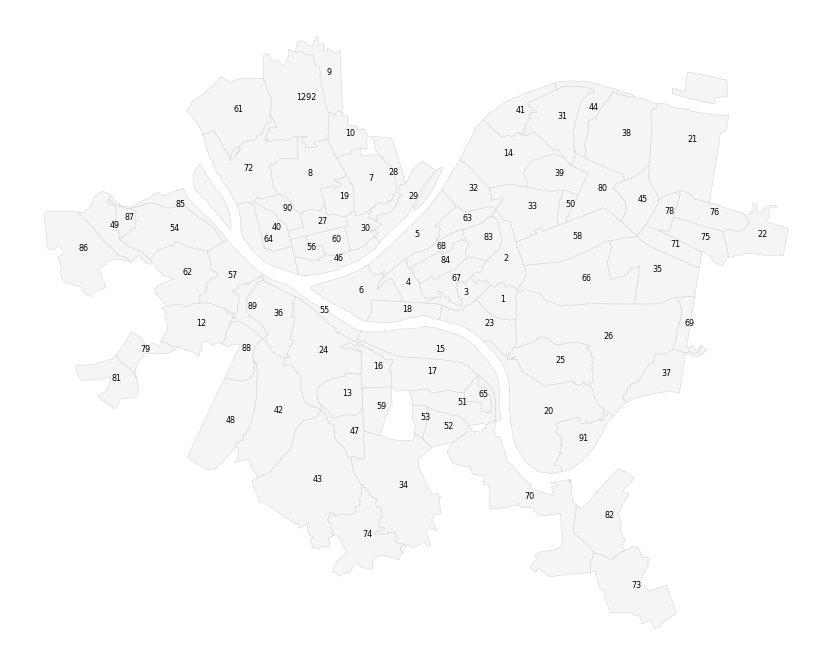

In [4]:
#plot the neighborhood ids on the map
ax = pittMap.plot(figsize = (15, 12), color = "whitesmoke", edgecolor = "lightgrey", linewidth = 0.5)
texts = []

for x, y, label in zip(map_points.geometry.x, map_points.geometry.y, map_points["objectid"]):
    texts.append(plt.text(x, y, label, fontsize = 8))

ax.set_axis_off()
#aT.adjust_text(texts, force_points=0.3, force_text=0.8, expand_points=(1,1), expand_text=(1,1), arrowprops=dict(arrowstyle="-", color='grey', lw=0.5))

In [5]:
#find the neighborhood ids that are in Pittsburgh and drop the 'None' cell
col_ID_list = pittMap['tractce10'].tolist()
columns = ['Neighborhoods']
iddf = pd.DataFrame(col_ID_list, columns=columns)

In [6]:
iddf = iddf.drop(iddf.index[89])
iddf

,Neighborhoods
0,040500
1,040400
2,040200
3,030500
4,020300
...,...
84,563000
85,563100
86,562600
87,250700


In [79]:
#Add those neighborhood ids to a set - we have 88 neighborhoods
setIDs = set([])
x = 0
for index, row in iddf.iterrows():
    setIDs.add(row['Neighborhoods'])
    x+=1
    print(row['Neighborhoods'])

print(x)
#not sure why the length is 10 short here.    
len(setIDs)

040500
040400
040200
030500
020300
020100
262000
261500
261200
260900
563100
562400
981000
170200
180300
170600
010300
250900
562900
980000
130600
040900
180700
151700
141400
250300
241200
240600
563200
101800
060300
080200
290400
981100
191100
141100
110200
101700
210700
101100
191600
191700
101400
120400
563200
562400
202300
563000
080700
561600
561700
561700
202200
980700
562700
562600
070900
300100
562700
270800
281400
060500
980600
561600
140100
051100
050900
141000
562900
140500
980900
310200
320400
130400
130200
120700
562800
111500
562800
310300
050600
050100
562500
563000
563000
563100
562600
250700
562300
89


78

In [83]:
#Load in the CSV poor housing neighborhoods data
housingdf = pd.read_csv('poorhousingconditions.csv')

#get only the neighborhood IDs that match to the Pittsburgh Neighborhood Map
housingdf = housingdf[housingdf.TRACT != 0]

#change the neighborhood ids to be strings and have a 0 in front to match the other df output
housingdf['tractce10'] = str('')

for index, row in housingdf.iterrows():
    strVal = str(row['TRACT'])
    strVals = strVal.split(".")
    if len(strVals[0]) < 6:
        strVals[0] = "0" + strVals[0]
    housingdf.at[index, 'tractce10'] = strVals[0]

In [84]:
#filter poor housing neighborhoods data by specified neighborhood ids
for index, row in housingdf.iterrows():
    if row['tractce10'] not in setIDs:
        housingdf = housingdf[housingdf.tractce10 != row['tractce10']]
len(setIDs)

78

In [1]:
#prep two merge the geodataframe and the dataframe together
pdf = pittMap.drop(pittMap.index[89])
pdf = pdf.merge(newIDdf, on='tractce10')

NameError: name 'pittMap' is not defined

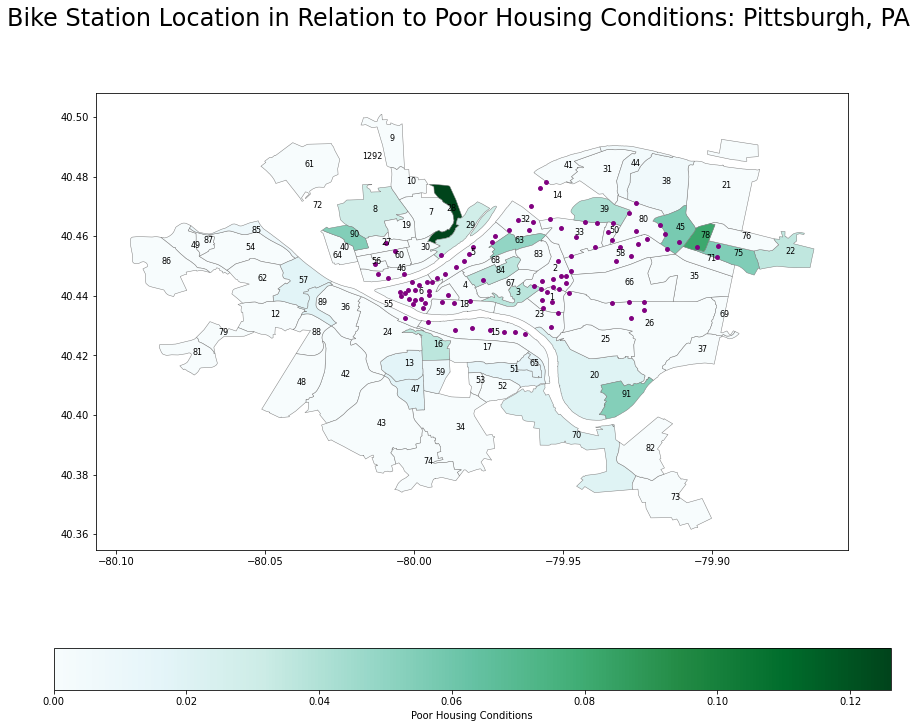

In [87]:
#plotting the poor housing condition data on the pittsburgh neighborhood map (data from 2016)
pdf.plot(column="poorCon", cmap='BuGn', figsize = (15, 12), edgecolor = "grey", linewidth = 0.5, legend=True, legend_kwds={'label': "Poor Housing Conditions",'orientation': "horizontal"})
#add object id labels
for x, y, label in zip(map_points.geometry.x, map_points.geometry.y, map_points["objectid"]):
    texts.append(plt.text(x, y, label, fontsize = 8))
#now adding the bike station location data on top of this map. 
result = plt.scatter(df['Longitude'], df['Latitude'], 15, marker='o', color='Purple')
#save figure and label it
resultFig = result.get_figure()
resultFig.suptitle('Bike Station Location in Relation to Poor Housing Conditions: Pittsburgh, PA', fontsize=24)
resultFig.savefig("result.png")